### Logistic Regression

Logistic Regression allows us to solve classification problems , where
<br> we are trying to predict discrete values.

We use the logistic function to output a value ranging from 0 to 1 .<br> Based off of this probability we assign a class. (Sigmoid function).

After training logistic regression model on training data , model can be evaluated
on<br> some test data using confusion matrix.

Confusion Matrix - Matrix of ACTUAL vs Predicted YES/NO

|     n = 165    |Predicted:NO   |Predicted:YES   |   
|-------------|---------------|----------------|
|Actual: NO   |  50  **True Negative**(TN)| 10 **False Positive**(FP)|  
|Actual: YES  |  5 **False Negative**(FN)| 100  **True Positive**(TP)    | 

__Acuuracy__ = (TP+TN)/total = 150/163 = 0.91<br>
* FP - TYPE I
* FN - TYPE II

##### TITANIC DATASET
---
Predict the classification of 'survived' or 'deceased' for passengers.<br>
on the titanic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [100]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

* SibSP - siblings/spouses aboard.
* ParCH - parents/children aboard.
* Embarked  - Port of embarkation - start

In [101]:
train.isnull()
# BOOLEAN - TRUE/FALSE

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
5          False     False   False  False  False   True  False  False   False   
6          False     False   False  False  False  False  False  False   False   
7          False     False   False  False  False  False  False  False   False   
8          False     False   False  False  False  False  False  False   False   
9          False     False   False  False  False  False  False  False   False   
10         False     False   False  False  False  False  False  False   False   
11         False     False   False  False  False  False  False  False   False   
12         False     False   False  False  False  False  False  False   False   
13         False     False   False  False  False  False  False  False   False   
14         False     False   False  False  False  False  False  False   False   
15         False     False   False  False  False  False  False  False   False   
16         False     False   False  False  False  False  False  False   False   
17         False     False   False  False  False   True  False  False   False   
18         False     False   False  False  False  False  False  False   False   
19         False     False   False  False  False   True  False  False   False   
20         False     False   False  False  False  False  False  False   False   
21         False     False   False  False  False  False  False  False   False   
22         False     False   False  False  False  False  False  False   False   
23         False     False   False  False  False  False  False  False   False   
24         False     False   False  False  False  False  False  False   False   
25         False     False   False  False  False  False  False  False   False   
26         False     False   False  False  False   True  False  False   False   
27         False     False   False  False  False  False  False  False   False   
28         False     False   False  False  False   True  False  False   False   
29         False     False   False  False  False   True  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
861        False     False   False  False  False  False  False  False   False   
862        False     False   False  False  False  False  False  False   False   
863        False     False   False  False  False   True  False  False   False   
864        False     False   False  False  False  False  False  False   False   
865        False     False   False  False  False  False  False  False   False   
866        False     False   False  False  False  False  False  False   False   
867        False     False   False  False  False  False  False  False   False   
868        False     False   False  False  False   True  False  False   False   
869        False     False   False  False  False  False  False  False   False   
870        False     False   False  False  False  False  False  False   False   
871        False     False   False  False  False  False  False  False   False   
872        False     False   False  False  False  False  False  False   False   
873        False     False   False  False  False  False  False  False   False   
874        False     False   False  False  False  False  False  False   False   
875        False     False   False  False  False  False  False  False   False   
876        False     False   False  False  False  False  False  False   False   
877        False     False   False  False  False  False  False  False   False   
878        False     False   False  

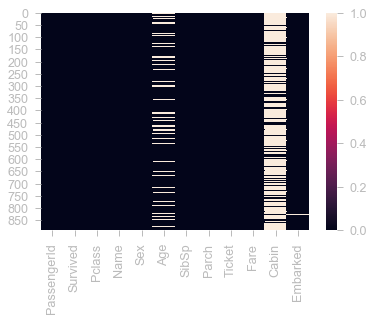

In [102]:
sns.heatmap(data = train.isnull())

_Refer lecture for different parameters._

Here we get a heatmap of Null Values  , True is highlighted.

Age column is reasonable , but Cabin column has too much missing data. 

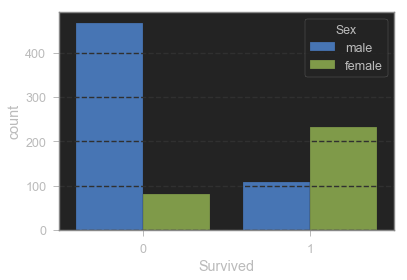

In [103]:
sns.countplot(x = 'Survived',hue = 'Sex',data = train )

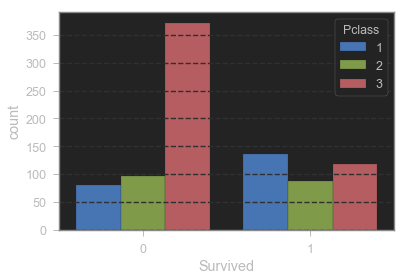

In [104]:
sns.countplot(x = 'Survived',hue = 'Pclass',data = train )

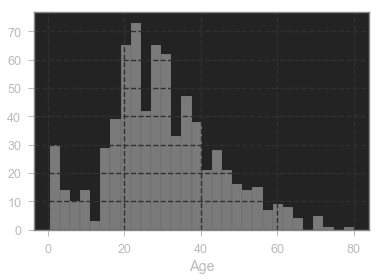

In [105]:
sns.distplot(train['Age'].dropna(),bins = 30 , kde = False , color = 'white')

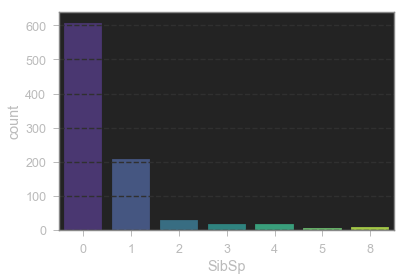

In [106]:
sns.countplot(x = 'SibSp', data = train , palette='viridis')

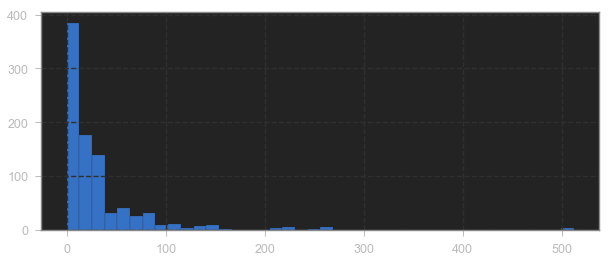

In [107]:
train['Fare'].hist(bins = 40,figsize=(10,4))

##### Cleaning Data

We can fill missing age as average , but a better interpretation.

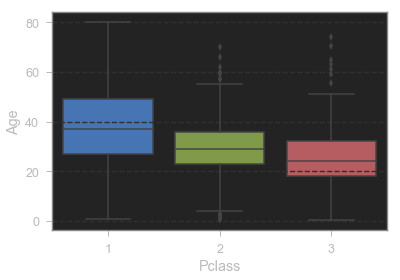

In [108]:
sns.boxplot(x = 'Pclass' , y = 'Age' , data = train)

Here we see that higher class people belong to a older age-range<br>
than lower class.

In [3]:
Avg_age = train.groupby(by='Pclass')['Age'].mean().round()
Avg_age

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [4]:
def avgAge(cols):
    if pd.isnull(cols[0]):
        return Avg_age[cols[1]]
    else:return cols[0]                

In [5]:
train['Age'] = train[['Age','Pclass']].apply(avgAge,axis=1)  # DOCS FOR AXIS
#Avg_age[x[1]]

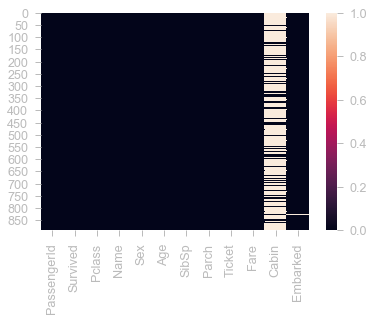

In [112]:
sns.heatmap(train.isnull())

In [6]:
train.drop(columns = 'Cabin',axis=1,inplace=True)

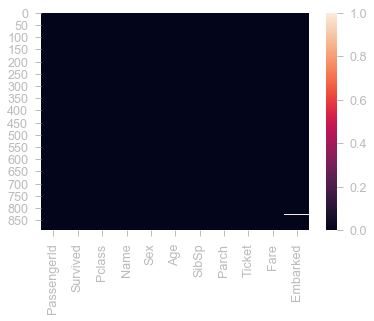

In [114]:
sns.heatmap(train.isnull())

In [7]:
#VERY FEW ROWS MISSING
train.dropna(inplace=True)

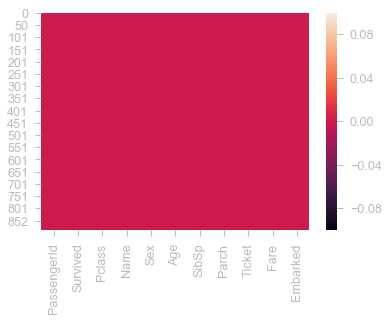

In [116]:
sns.heatmap(train.isnull())

Now we need to convert categorical labels in some sort of<br>
numeric data so that algorithm can infer it.

In [8]:
# DUMMY VARIABLES
pd.get_dummies(data = train['Sex'])

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
5         0     1
6         0     1
7         0     1
8         1     0
9         1     0
10        1     0
11        1     0
12        0     1
13        0     1
14        1     0
15        1     0
16        0     1
17        0     1
18        1     0
19        1     0
20        0     1
21        0     1
22        1     0
23        0     1
24        1     0
25        1     0
26        0     1
27        0     1
28        1     0
29        0     1
..      ...   ...
861       0     1
862       1     0
863       1     0
864       0     1
865       1     0
866       1     0
867       0     1
868       0     1
869       0     1
870       0     1
871       1     0
872       0     1
873       0     1
874       1     0
875       1     0
876       0     1
877       0     1
878       0     1
879       1     0
880       1     0
881       0     1
882       1     0
883       0     1
884       0     1
885       1     0
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[889 rows x 2 columns]

Now here the problem is , the columns are 'multi-collinear'<br>
They are perfect predictors of other , so ML algo will know<br> 
the other column and it will mess up the algo.
So we drop a column so that there are indirect dependencies.

In [9]:
sex = pd.get_dummies(data=train['Sex'],drop_first=True)

In [10]:
embark = pd.get_dummies(data = train['Embarked'],drop_first=True)

In [11]:
train = pd.concat([train,sex,embark],axis=1)

In [12]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Embarked  male  Q  S  
0      0  A/5 21171   7.2500        S     1  0  1  
1      0   PC 17599  71.2833        C     0  0  0

In [13]:
train.drop(columns = ['PassengerId','Name','Sex','Ticket','Embarked'], axis=1,inplace=True )

In [14]:
train.head(2)

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0

#### Method 1 :
---
Use only the titanic_train.csv

In [15]:
X = train[train.columns[1:]]
y = train['Survived']

In [16]:
from sklearn.model_selection import train_test_split as tts
X_train , X_test , y_train , y_test = tts(X,y,test_size=0.3,random_state=101)

In [17]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()

In [18]:
# TRAIN THE MODEL ON TRAINING-DATA
lrm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
predictions = lrm.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [20]:
lrm.predict_proba(X_test)

array([[0.87492191, 0.12507809],
       [0.85547146, 0.14452854],
       [0.25649268, 0.74350732],
       [0.09166525, 0.90833475],
       [0.85093045, 0.14906955],
       [0.93955718, 0.06044282],
       [0.84794106, 0.15205894],
       [0.78004556, 0.21995444],
       [0.90087675, 0.09912325],
       [0.41037589, 0.58962411],
       [0.2580896 , 0.7419104 ],
       [0.0795279 , 0.9204721 ],
       [0.87500084, 0.12499916],
       [0.42337811, 0.57662189],
       [0.87417764, 0.12582236],
       [0.85999018, 0.14000982],
       [0.09230862, 0.90769138],
       [0.18656179, 0.81343821],
       [0.44477478, 0.55522522],
       [0.88061631, 0.11938369],
       [0.87460798, 0.12539202],
       [0.89157865, 0.10842135],
       [0.62603968, 0.37396032],
       [0.67733127, 0.32266873],
       [0.93128844, 0.06871156],
       [0.60594444, 0.39405556],
       [0.4605897 , 0.5394103 ],
       [0.4770403 , 0.5229597 ],
       [0.88307904, 0.11692096],
       [0.72901668, 0.27098332],
       [0.

In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



More on report [https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/ ]

In [167]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8089887640449438

#### Method 2 :
---
Using both train and test

In [132]:
test = pd.read_csv('titanic_test.csv')

In [133]:
test.head(2)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S

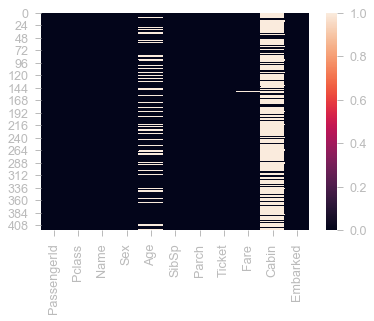

In [134]:
sns.heatmap(test.isnull())

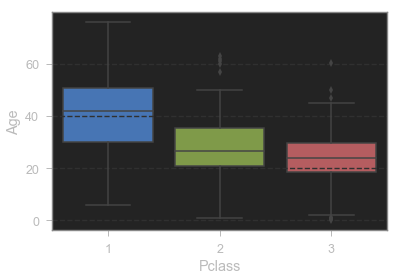

In [135]:
sns.boxplot(x='Pclass',y='Age',data=test)

In [136]:
average = test.groupby(by='Pclass')['Age'].mean()

In [137]:
average.round()

Pclass
1    41.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [138]:
def fillAge(cols):
    if pd.isnull(cols[0]) :
        return average[cols[1]]
    else:
        return cols[0]    

In [139]:
test['Age'] = test[['Age','Pclass']].apply(fillAge,axis=1)

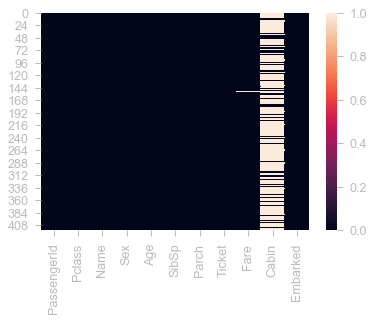

In [140]:
sns.heatmap(test.isnull())

In [141]:
test.drop('Cabin',axis=1,inplace=True)

In [142]:
test.dropna(inplace=True)

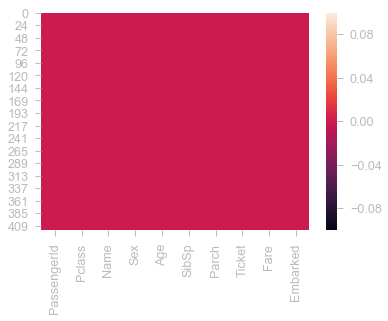

In [143]:
sns.heatmap(test.isnull())

In [144]:
test.head(2)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Embarked  
0      0  330911  7.8292        Q  
1      0  363272  7.0000        S

In [150]:
test = pd.get_dummies(columns=['Sex','Embarked'],prefix='',prefix_sep='',data=test,drop_first=True)

In [151]:
test.head(2)

PassengerId  Pclass                              Name   Age  SibSp  Parch  \
0          892       3                  Kelly, Mr. James  34.5      0      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  47.0      1      0   

   Ticket    Fare  male  Q  S  
0  330911  7.8292     1  1  0  
1  363272  7.0000     0  0  1

In [152]:
test.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

Modelling

In [153]:
train.head(1)

Survived  Pclass   Age  SibSp  Parch  Fare  male  Q  S
0         0       3  22.0      1      0  7.25     1  0  1

In [154]:
test.head(1)

Pclass   Age  SibSp  Parch    Fare  male  Q  S
0       3  34.5      0      0  7.8292     1  1  0

In [161]:
X_test = test

In [163]:
test['Survived'] = lrm.predict(X_test)

In [164]:
test

Pclass        Age  SibSp  Parch      Fare  male  Q  S  Survived
0         3  34.500000      0      0    7.8292     1  1  0         0
1         3  47.000000      1      0    7.0000     0  0  1         0
2         2  62.000000      0      0    9.6875     1  1  0         0
3         3  27.000000      0      0    8.6625     1  0  1         0
4         3  22.000000      1      1   12.2875     0  0  1         1
5         3  14.000000      0      0    9.2250     1  0  1         0
6         3  30.000000      0      0    7.6292     0  1  0         1
7         2  26.000000      1      1   29.0000     1  0  1         0
8         3  18.000000      0      0    7.2292     0  0  0         1
9         3  21.000000      2      0   24.1500     1  0  1         0
10        3  24.027945      0      0    7.8958     1  0  1         0
11        1  46.000000      0      0   26.0000     1  0  1         0
12        1  23.000000      1      0   82.2667     0  0  1         1
13        2  63.000000      1      0   26.0000     1  0  1         0
14        1  47.000000      1      0   61.1750     0  0  1         1
15        2  24.000000      1      0   27.7208     0  0  0         1
16        2  35.000000      0      0   12.3500     1  1  0         0
17        3  21.000000      0      0    7.2250     1  0  0         0
18        3  27.000000      1      0    7.9250     0  0  1         1
19        3  45.000000      0      0    7.2250     0  0  0         1
20        1  55.000000      1      0   59.4000     1  0  0         0
21        3   9.000000      0      1    3.1708     1  0  1         0
22        1  40.918367      0      0   31.6833     0  0  1         1
23        1  21.000000      0      1   61.3792     1  0  0         1
24        1  48.000000      1      3  262.3750     0  0  0         1
25        3  50.000000      1      0   14.5000     1  0  1         0
26        1  22.000000      0      1   61.9792     0  0  0         1
27        3  22.500000      0      0    7.2250     1  0  0         0
28        1  41.000000      0      0   30.5000     1  0  1         0
29        3  24.027945      2      0   21.6792     1  0  0         0
..      ...        ...    ...    ...       ...   ... .. ..       ...
388       3  21.000000      0      0    7.7500     1  1  0         0
389       3   6.000000      3      1   21.0750     1  0  1         0
390       1  23.000000      0      0   93.5000     1  0  1         1
391       1  51.000000      0      1   39.4000     0  0  1         1
392       3  13.000000      0      2   20.2500     1  0  1         0
393       2  47.000000      0      0   10.5000     1  0  1         0
394       3  29.000000      3      1   22.0250     1  0  1         0
395       1  18.000000      1      0   60.0000     0  0  1         1
396       3  24.000000      0      0    7.2500     1  1  0         0
397       1  48.000000      1      1   79.2000     0  0  0         1
398       3  22.000000      0      0    7.7750     1  0  1         0
399       3  31.000000      0      0    7.7333     1  1  0         0
400       1  30.000000      0      0  164.8667     0  0  1         1
401       2  38.000000      1      0   21.0000     1  0  1         0
402       1  22.000000      0      1   59.4000     0  0  0         1
403       1  17.000000      0      0   47.1000     1  0  1         1
404       1  43.000000      1      0   27.7208     1  0  0         0
405       2  20.000000      0      0   13.8625     1  0  0         0
406       2  23.000000      1      0   10.5000     1  0  1         0
407       1  50.000000      1      1  211.5000     1  0  0         0
408       3  24.027945      0      0    7.7208     0  1  0         1
409       3   3.000000      1      1   13.7750     0  0  1         1
410       3  24.027945      0      0    7.7500     0  1  0         1
411       1  37.000000      1      0   90.0000     0  1  0         1
412       3  28.000000      0      0    7.7750     0  0  1         1
413       3  24.027945      0      0    8.0500     1  0  1         0
414

In [165]:
lrm.coef_

array([[-7.87009914e-01, -2.61808017e-02, -2.17524476e-01,
        -8.72426379e-02,  4.67849538e-03, -2.32185356e+00,
        -1.66549610e-03, -1.70089680e-01]])